Name Surname:Ömer YILDIZ

Student No:150200060

---

Libraries to be used

---

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [7]:

class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self):
        for i in range(self.iterations):
            # Linear model
            model = np.dot(self.train_data, self.weights) + self.bias
            # Apply sigmoid to get probabilities
            predictions = self.sigmoid(model)

            # Calculate gradients and update weights
            errors = predictions - self.train_label
            dw = (2 / len(self.train_data)) * np.dot(self.train_data.T, errors * predictions * (1 - predictions))
            db = (2 / len(self.train_data)) * np.sum(errors * predictions * (1 - predictions))

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track accuracy every 100 iterations
            if i % 100 == 0:
                train_accuracy = self.accuracy(self.train_data, self.train_label)
                test_accuracy = self.accuracy(self.test_data, self.test_label)
                self.accuracy_train_data_during_training.append(train_accuracy)
                self.accuracy_test_data_during_training.append(test_accuracy)

    def predict(self, test_data):
        # Predict probabilities and convert to binary labels
        model = np.dot(test_data, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

    def accuracy(self, data, labels):
        # Calculate accuracy
        predictions = self.predict(data)
        return np.mean(predictions == labels)


Logistic Regression with Cross Entropy Loss (5 points)

In [8]:
import numpy as np

class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # Compute the sigmoid of z
        return 1 / (1 + np.exp(-z))

    def fit(self):
        for i in range(self.iterations):
            # Compute linear model and apply sigmoid to get probabilities
            model = np.dot(self.train_data, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients for weights and bias
            errors = predictions - self.train_label
            dw = (1 / len(self.train_data)) * np.dot(self.train_data.T, errors)
            db = (1 / len(self.train_data)) * np.sum(errors)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute accuracy every 100 iterations
            if i % 100 == 0:
                train_accuracy = self.accuracy(self.train_data, self.train_label)
                test_accuracy = self.accuracy(self.test_data, self.test_label)
                self.accuracy_train_data_during_training.append(train_accuracy)
                self.accuracy_test_data_during_training.append(test_accuracy)

    def predict(self, test_data):
        # Compute linear model and apply sigmoid to get probabilities
        model = np.dot(test_data, self.weights) + self.bias
        probabilities = self.sigmoid(model)

        # Convert probabilities to binary classification
        return [1 if prob > 0.5 else 0 for prob in probabilities]

    def accuracy(self, data, labels):
        # Compute predictions
        predictions = self.predict(data)

        # Calculate accuracy as the fraction of correct predictions
        return np.mean(predictions == labels)


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


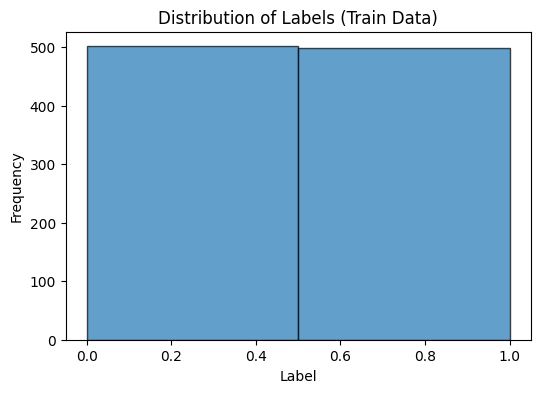

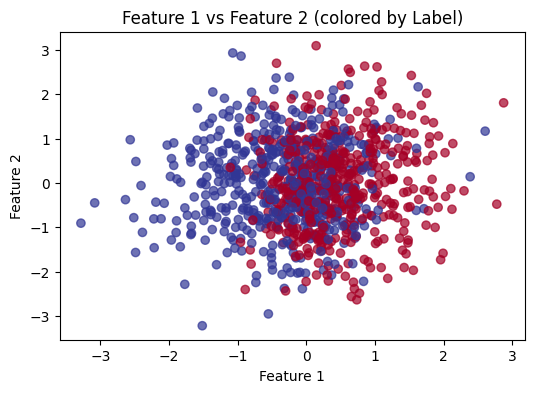

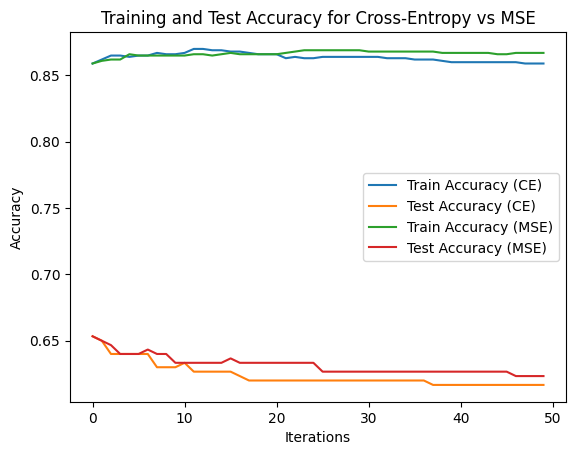

In [9]:
# Generate synthetic binary classification dataset
def generate_synthetic_data(n_samples=1000, n_features=10):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=42)
    return X, y

# Generate synthetic data
train_data, train_label = generate_synthetic_data(n_samples=1000, n_features=10)
test_data, test_label = generate_synthetic_data(n_samples=300, n_features=10)

model_ce = LogisticRegressionCrossEntropy(train_data, train_label, test_data, test_label)
model_ce.fit()

model_mse = LogisticRegressionMSE(train_data, train_label, test_data, test_label)
model_mse.fit()


# Plot the distribution of labels
plt.figure(figsize=(6, 4))
plt.hist(train_label, bins=2, edgecolor='black', alpha=0.7)
plt.title("Distribution of Labels (Train Data)")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

# Visualizing the first two features with respect to the label for better understanding
plt.figure(figsize=(6, 4))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.title("Feature 1 vs Feature 2 (colored by Label)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot training and testing accuracy
plt.plot(model_ce.accuracy_train_data_during_training, label="Train Accuracy (CE)")
plt.plot(model_ce.accuracy_test_data_during_training, label="Test Accuracy (CE)")
plt.plot(model_mse.accuracy_train_data_during_training, label="Train Accuracy (MSE)")
plt.plot(model_mse.accuracy_test_data_during_training, label="Test Accuracy (MSE)")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy for Cross-Entropy vs MSE')
plt.show()

#### Experiment

Dataset preparation

In [10]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [11]:
# Initialize and train models
model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test)
model_ce.fit()

model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test)
model_mse.fit()


Plot the training and test accuracy across the learning iterations of gradient descent

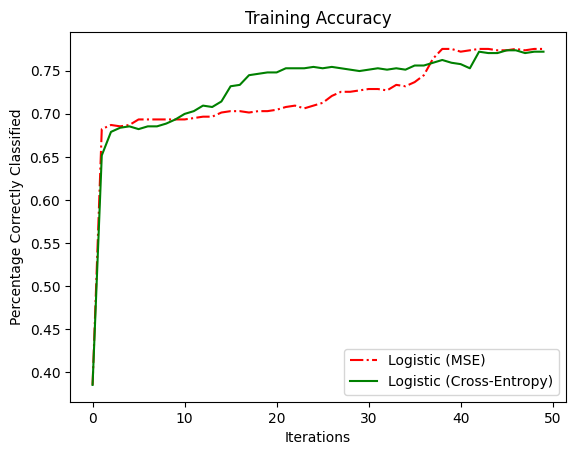

In [12]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(model_mse.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

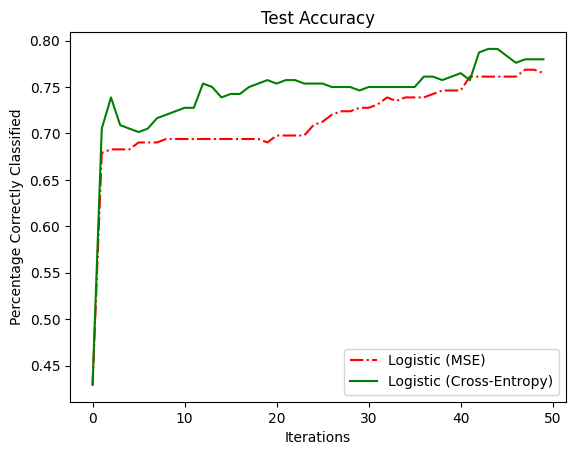

In [13]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Answer:
### Differences Between MSE and Cross-Entropy Loss in Logistic Regression

1. **Loss Function Definitions**:
   - **Mean Squared Error (MSE):**
     - MSE is a loss function commonly used in regression problems. In the context of logistic regression, it measures the squared difference between the predicted probability and the actual label.
     
   - **Cross-Entropy Loss (Log Loss):**
     - Cross-Entropy is specifically designed for classification tasks and measures the difference between the true labels and predicted probabilities.
    
2. **Key Differences**:
   - **Purpose:** MSE is used primarily in regression tasks, while Cross-Entropy is used in classification tasks. Cross-Entropy is more appropriate for the probabilistic nature of logistic regression.
   - **Gradient Behavior:**
     - Cross-Entropy gives gradients that align more effectively with the logistic function. The gradients tend to be well-scaled for logistic regression, promoting stable convergence.
     - MSE can lead to slower learning because the gradients depend on the squared difference between the predicted and actual labels, which might not always be effective for probability outputs (values between 0 and 1).
   - **Convergence Speed:** Because Cross-Entropy Loss aligns with the output of the logistic sigmoid function and directly penalizes incorrect classification, it usually leads to faster and more stable learning.

### Why One Version of Logistic Regression Learns Faster

- **Gradient Magnitude and Direction:**
  - Cross-Entropy Loss directly optimizes the probability predictions, leading to more accurate updates to the model's parameters. The gradient of Cross-Entropy is well-suited for logistic regression because it matches the probabilistic nature of the logistic function.
  - MSE, on the other hand, treats the predictions as continuous values, which can result in smaller or less effective gradients, especially when the predictions are close to the true labels. This can make learning slower, requiring more iterations for convergence.

- **Convergence Stability:**
  - In practice, models using **Cross-Entropy Loss** converge more quickly and smoothly because the gradient descent steps are better aligned with the classification task. MSE can cause slower or more erratic updates due to the less appropriate gradient behavior for classification.

In conclusion, **Cross-Entropy Loss** generally leads to faster convergence in logistic regression because it better aligns with the classification problem, providing more efficient gradients for model updates.



Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)

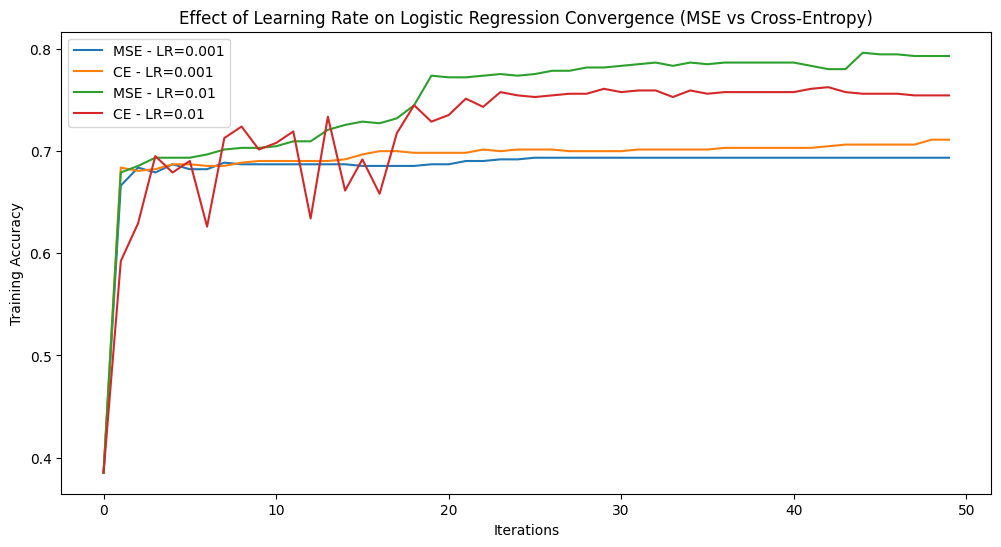

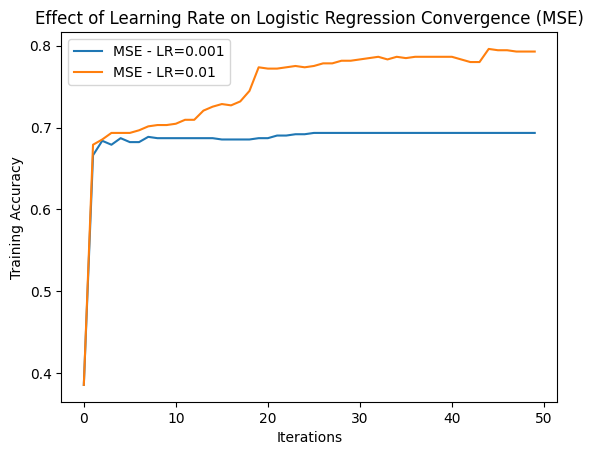

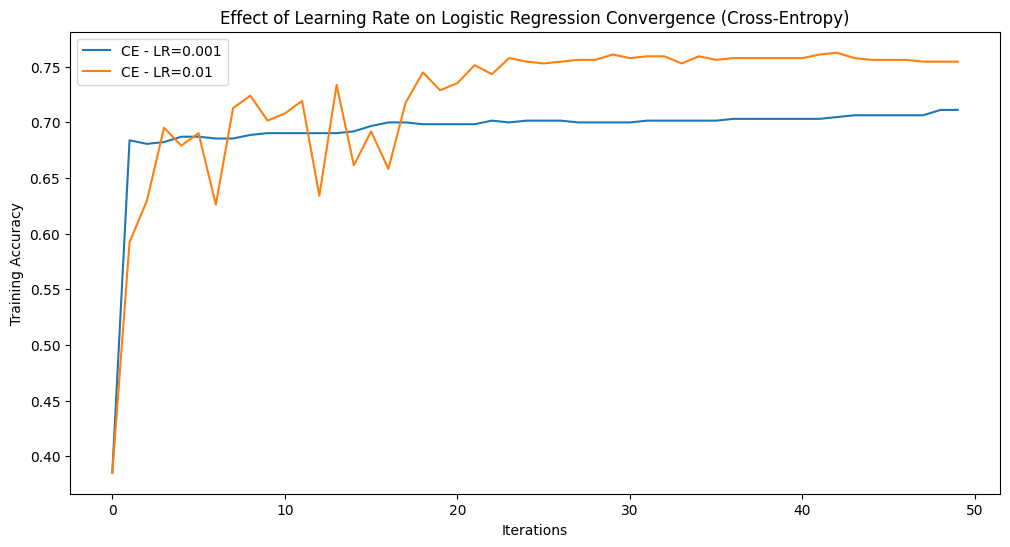

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

learning_rates = [0.001, 0.01]
iterations_list = [500, 1000, 5000]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)
    model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)

    model_mse.fit()
    model_ce.fit()

    plt.plot(model_mse.accuracy_train_data_during_training, label=f'MSE - LR={lr}')
    plt.plot(model_ce.accuracy_train_data_during_training, label=f'CE - LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Effect of Learning Rate on Logistic Regression Convergence (MSE vs Cross-Entropy)')
plt.legend()
plt.show()


for lr in learning_rates:
    model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)

    model_mse.fit()

    plt.plot(model_mse.accuracy_train_data_during_training, label=f'MSE - LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Effect of Learning Rate on Logistic Regression Convergence (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)

    model_ce.fit()

    plt.plot(model_ce.accuracy_train_data_during_training, label=f'CE - LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Effect of Learning Rate on Logistic Regression Convergence (Cross-Entropy)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

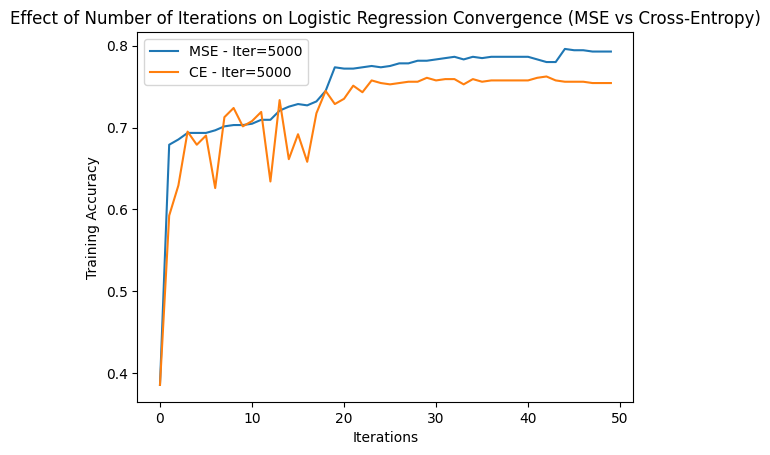

In [15]:


model_mse3 = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
model_ce3 = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)

model_mse3.fit()
model_ce3.fit()

plt.plot(model_mse3.accuracy_train_data_during_training, label=f'MSE - Iter={5000}')
plt.plot(model_ce3.accuracy_train_data_during_training, label=f'CE - Iter={5000}')

plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Effect of Number of Iterations on Logistic Regression Convergence (MSE vs Cross-Entropy)')
plt.legend()
plt.show()


Function to Fine Tune Logistic Regression Models


In [22]:


def tune_hyperparameters():
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
    iterations_list = [500, 1000, 2000, 5000, 10000]

    best_mse_accuracy = 0
    best_ce_accuracy = 0
    best_mse_params = (None, None)
    best_ce_params = (None, None)

    mse_results = {}
    ce_results = {}

    for lr in learning_rates:
        for iters in iterations_list:
            model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=iters)
            model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=iters)

            model_mse.fit()
            model_ce.fit()

            mse_train_accuracy = model_mse.accuracy_train_data_during_training[-1]
            ce_train_accuracy = model_ce.accuracy_train_data_during_training[-1]

            if mse_train_accuracy > best_mse_accuracy:
                best_mse_accuracy = mse_train_accuracy
                best_mse_params = (lr, iters)

            if ce_train_accuracy > best_ce_accuracy:
                best_ce_accuracy = ce_train_accuracy
                best_ce_params = (lr, iters)

            mse_results[(lr, iters)] = mse_train_accuracy
            ce_results[(lr, iters)] = ce_train_accuracy

    return best_mse_params, best_ce_params, mse_results, ce_results
best_mse_params, best_ce_params, mse_results, ce_results = tune_hyperparameters()



Best MSE Parameters: Learning Rate=0.05, Iterations=5000
Best Cross-Entropy Parameters: Learning Rate=0.005, Iterations=10000
Best MSE Accuracy: 0.8057784911717496
Best Cross-Entropy Accuracy: 0.7897271268057785


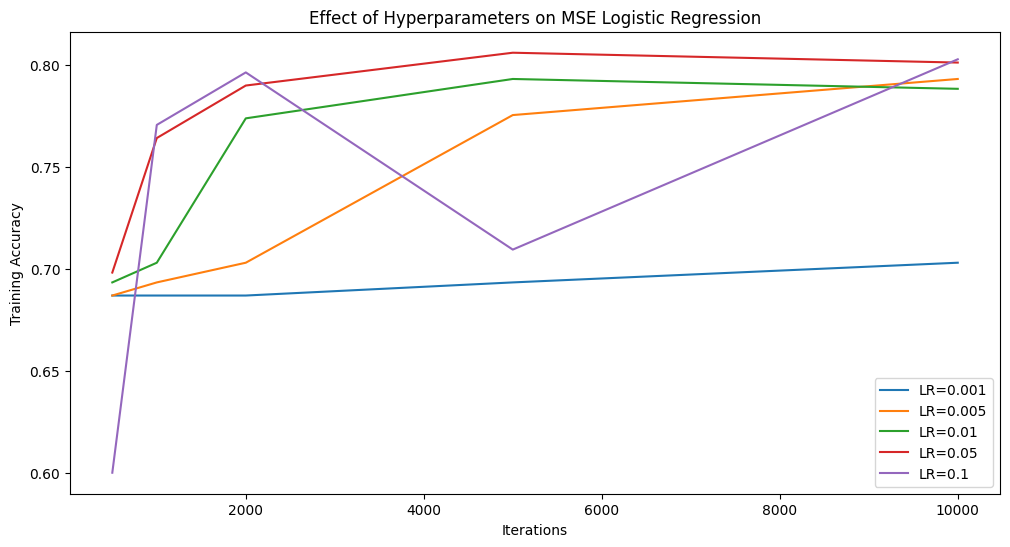

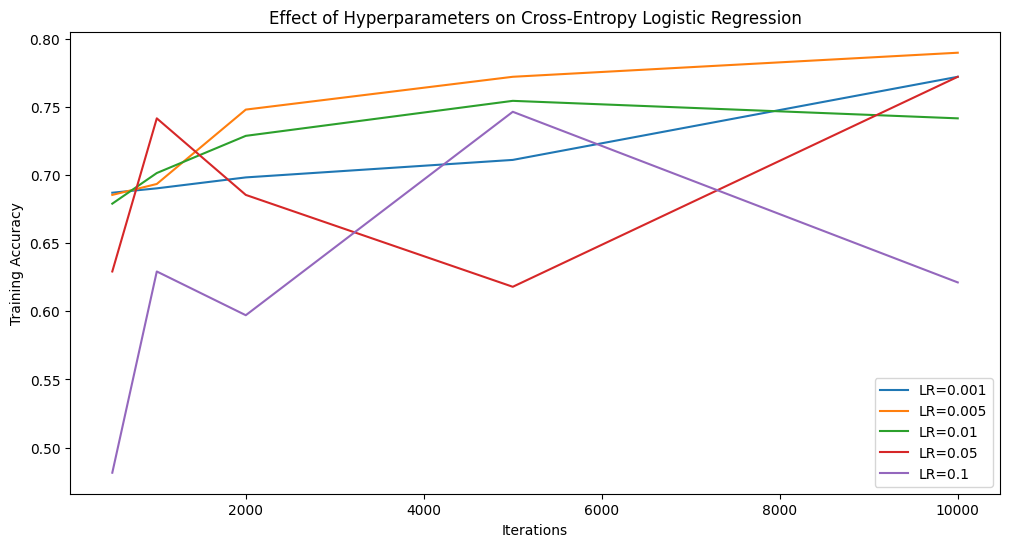

In [23]:

print(f"Best MSE Parameters: Learning Rate={best_mse_params[0]}, Iterations={best_mse_params[1]}")
print(f"Best Cross-Entropy Parameters: Learning Rate={best_ce_params[0]}, Iterations={best_ce_params[1]}")

print(f"Best MSE Accuracy: {mse_results[best_mse_params]}")
print(f"Best Cross-Entropy Accuracy: {ce_results[best_ce_params]}")

def plot_results(results, title):
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
    iterations_list = [500, 1000, 2000, 5000, 10000]

    plt.figure(figsize=(12, 6))
    for lr in learning_rates:
        accuracies = []
        for iters in iterations_list:
            accuracies.append(results.get((lr, iters), 0))  # Get accuracy for each iteration
        plt.plot(iterations_list, accuracies, label=f"LR={lr}")

    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(mse_results, "Effect of Hyperparameters on MSE Logistic Regression")

plot_results(ce_results, "Effect of Hyperparameters on Cross-Entropy Logistic Regression")


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [24]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          # Index of the feature to split on
        self.threshold = threshold      # Threshold value for the split
        self.left = left                # Left subtree
        self.right = right              # Right subtree
        self.value = value              # Leaf value

class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns
        self.root = None

    def fit(self, train_data, train_label):
        self.root = self._build_tree(train_data, train_label, depth=0)

    def _build_tree(self, data, labels, depth):
        # Stop conditions
        if len(set(labels)) == 1:  # Pure node
            return Node(value=labels[0])
        if depth == self.max_depth or len(data) == 0:
            return Node(value=max(set(labels), key=list(labels).count))

        # Find the best split
        feature, threshold = self._best_split(data, labels)
        if feature is None:  # No split found
            return Node(value=max(set(labels), key=list(labels).count))

        # Split data
        left_indices = data[:, feature] <= threshold
        right_indices = ~left_indices
        left_child = self._build_tree(data[left_indices], labels[left_indices], depth + 1)
        right_child = self._build_tree(data[right_indices], labels[right_indices], depth + 1)

        return Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    def _best_split(self, data, labels):
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(data.shape[1]):
            thresholds = set(data[:, feature])
            for threshold in thresholds:
                left_indices = data[:, feature] <= threshold
                right_indices = ~left_indices
                if sum(left_indices) == 0 or sum(right_indices) == 0:
                    continue
                gini = self._gini_index(labels[left_indices], labels[right_indices])
                if gini < best_gini:
                    best_gini, best_feature, best_threshold = gini, feature, threshold

        return best_feature, best_threshold

    def _gini_index(self, left_labels, right_labels):
        def gini(labels):
            proportions = [list(labels).count(c) / len(labels) for c in set(labels)]
            return 1 - sum(p ** 2 for p in proportions)

        n = len(left_labels) + len(right_labels)
        gini_left = gini(left_labels) * len(left_labels) / n
        gini_right = gini(right_labels) * len(right_labels) / n
        return gini_left + gini_right

    def predict(self, test_data):
        return [self._traverse_tree(self.root, x) for x in test_data]

    def _traverse_tree(self, node, sample):
        if node.value is not None:  # Leaf node
            return node.value
        if sample[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, sample)
        else:
            return self._traverse_tree(node.right, sample)

    def print_tree(self):
        def _print(node, depth):
            if node.value is not None:  # Leaf node
                print("\t" * depth + f"Leaf: {node.value}")
            else:
                print("\t" * depth + f"{self.columns[node.feature]} <= {node.threshold}")
                _print(node.left, depth + 1)
                _print(node.right, depth + 1)

        _print(self.root, 0)


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(
    n_samples=100,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

columns = [f'Feature{i+1}' for i in range(X_train.shape[1])]
custom_tree = DecisionTree(columns, depth=5)
custom_tree.fit(X_train, y_train)
custom_preds = custom_tree.predict(X_test)

sklearn_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)
sklearn_preds = sklearn_tree.predict(X_test)

custom_accuracy = accuracy_score(y_test, custom_preds)
sklearn_accuracy = accuracy_score(y_test, sklearn_preds)

print("Custom Decision Tree Accuracy:", custom_accuracy)
print("Sklearn Decision Tree Accuracy:", sklearn_accuracy)

print("\nCustom Decision Tree Structure:")
custom_tree.print_tree()


Custom Decision Tree Accuracy: 0.8
Sklearn Decision Tree Accuracy: 0.9

Custom Decision Tree Structure:
Feature1 <= -0.11775537189541041
	Feature3 <= 0.1346435252419278
		Feature5 <= 2.510895067057125
			Leaf: 0
			Leaf: 1
		Leaf: 1
	Feature5 <= -0.6668328135520585
		Feature3 <= -0.7935634231064025
			Leaf: 0
			Feature1 <= 2.6898431359448
				Feature4 <= -2.0674421000398766
					Leaf: 0
					Leaf: 1
				Leaf: 0
		Feature4 <= 2.060747924881987
			Leaf: 1
			Leaf: 0


#### Experiment

Dataset preparation

In [26]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [27]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
custom_tree = DecisionTree(columns, depth=3)
custom_tree.fit(X_train, y_train)

custom_preds = custom_tree.predict(X_test)
custom_accuracy = accuracy_score(y_test, custom_preds)

print("Custom Decision Tree Accuracy on Titanic dataset:", custom_accuracy)


Custom Decision Tree Accuracy on Titanic dataset: 0.8097014925373134


Print the decision tree (5 points)

In [28]:

print("\nCustom Decision Tree Structure:")
custom_tree.print_tree()


Custom Decision Tree Structure:
Sex <= 0.0
	Fare <= 52.0
		Parch <= 0.0
			Leaf: 0
			Leaf: 0
		SibSp <= 1.0
			Leaf: 0
			Leaf: 0
	Pclass <= 2.0
		Fare <= 146.5208
			Leaf: 1
			Leaf: 1
		Fare <= 23.25
			Leaf: 1
			Leaf: 0


Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)

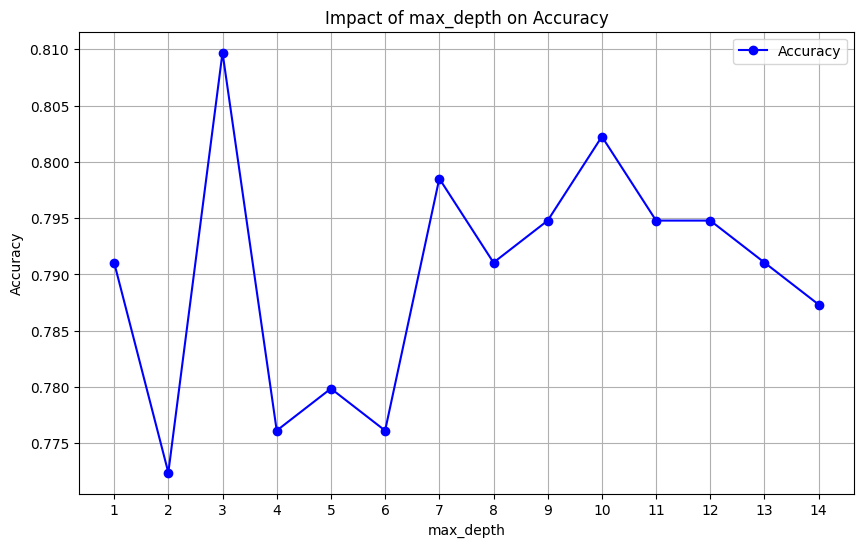

max_depth=1, Accuracy=0.7910
max_depth=2, Accuracy=0.7724
max_depth=3, Accuracy=0.8097
max_depth=4, Accuracy=0.7761
max_depth=5, Accuracy=0.7799
max_depth=6, Accuracy=0.7761
max_depth=7, Accuracy=0.7985
max_depth=8, Accuracy=0.7910
max_depth=9, Accuracy=0.7948
max_depth=10, Accuracy=0.8022
max_depth=11, Accuracy=0.7948
max_depth=12, Accuracy=0.7948
max_depth=13, Accuracy=0.7910
max_depth=14, Accuracy=0.7873


In [29]:
import matplotlib.pyplot as plt

# List to store accuracies for different depths
depths = range(1, 15)  # Try max_depth from 1 to 10
accuracies = []

for depth in depths:
    # Create and train the decision tree with the current depth
    custom_tree = DecisionTree(columns, depth=depth)
    custom_tree.fit(X_train, y_train)

    # Predict and calculate accuracy
    custom_preds = custom_tree.predict(X_test)
    accuracy = accuracy_score(y_test, custom_preds)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', color='b', label="Accuracy")
plt.title("Impact of max_depth on Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.grid()
plt.legend()
plt.show()

# Print the results
for d, acc in zip(depths, accuracies):
    print(f"max_depth={d}, Accuracy={acc:.4f}")


In [ ]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

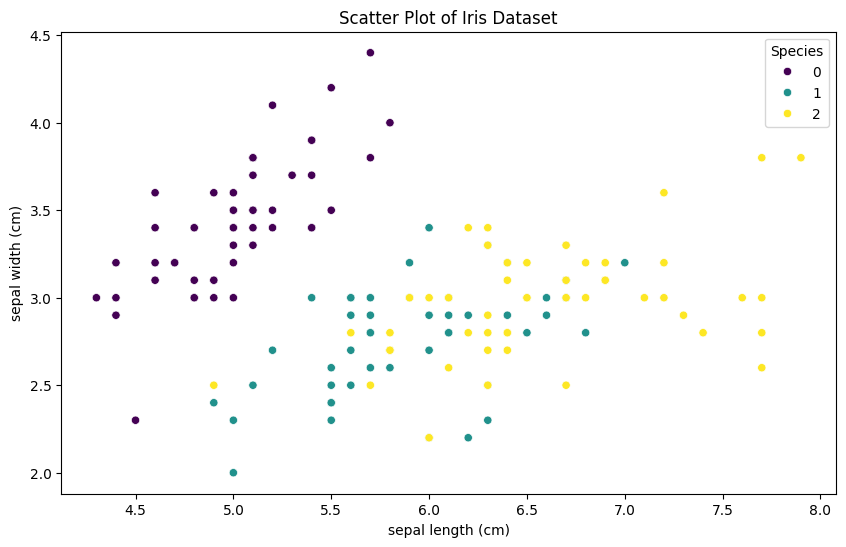

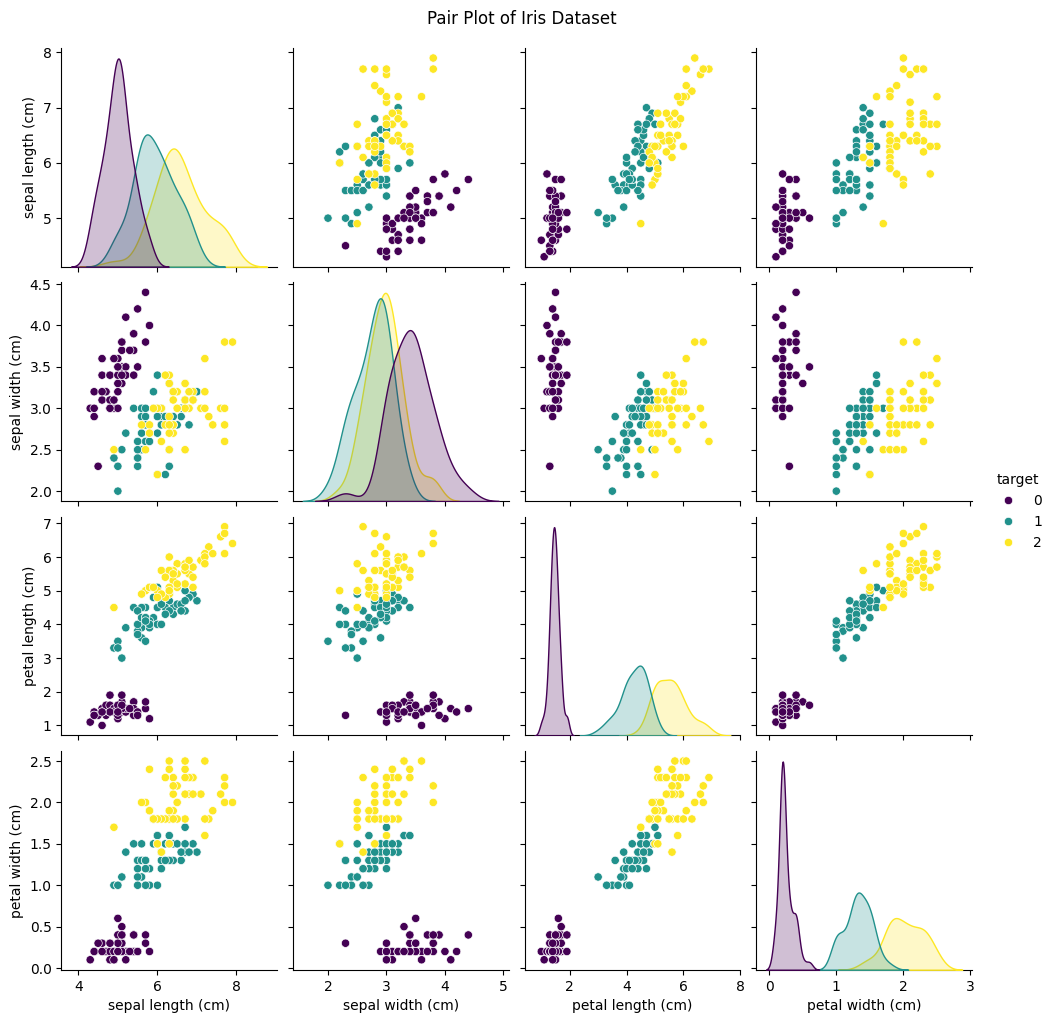

In [ ]:
df = pd.DataFrame(X, columns=columns)
df['target'] = Y

# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[columns[0]], y=df[columns[1]], hue=df['target'], palette='viridis')
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend(title='Species')
plt.show()
# Pair plot
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

In [ ]:
depths = range(1, 7)
tree_arr = []

for depth in depths:
    custom_tree = DecisionTree(columns, depth)

    custom_tree.fit(X_train, y_train)

    custom_preds = custom_tree.predict(X_test)
    custom_accuracy = accuracy_score(y_test, custom_preds)
    accuracies.append(custom_accuracy)
    tree_arr.append(custom_tree)


best_tree = tree_arr[np.argmax(accuracies)]
best_accuracy = accuracies[np.argmax(accuracies)]
depth = depths[np.argmax(accuracies)]

print(f"Best Decision Tree with Depth {depth} Tree Accuracy on Iris dataset:", best_accuracy)

print(f"\nCustom Decision Tree with Depth {depth} Structure:")
custom_tree.print_tree()




Best Decision Tree with Depth 2 Tree Accuracy on Iris dataset: 0.9777777777777777

Custom Decision Tree with Depth 2 Structure:
petal length (cm) <= 1.9
	Leaf: 0
	petal length (cm) <= 4.7
		petal width (cm) <= 1.5
			Leaf: 1
			Leaf: 2
		petal width (cm) <= 1.7
			petal length (cm) <= 4.9
				Leaf: 1
				petal width (cm) <= 1.5
					Leaf: 2
					sepal length (cm) <= 6.7
						Leaf: 1
						Leaf: 2
			petal length (cm) <= 4.8
				sepal length (cm) <= 5.9
					Leaf: 1
					Leaf: 2
				Leaf: 2
